In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

from scipy.stats import pearsonr

%matplotlib inline

In [2]:
expDF = pd.read_csv('data/BehaviorSpace/phase_02/phase_02.csv')

expDF.rename(columns={'(list (report-crimes-per-hour) (total-crimes))': 'results', 
                      '[step]':'step', '[run number]':'run_number'}, inplace=True)

In [3]:
# Getting the total of robberies
total_robberies_temp = expDF.results.str.split(']', expand=True)
# Converting all values to int and adding to the DF
expDF['num_crimes'] = total_robberies_temp[1].str.strip().astype(int)

In [4]:
# Convert the crimes distribution vector to a python list
expDF['crimes_dist'] = [list(map(int, i.split(' '))) for i in total_robberies_temp[0].str.split('[', expand=True)[2]]
# Delete the column results
expDF.drop(['results'], axis=1, inplace=True)

In [5]:
expDF.head(2)

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,1,0.8,0.04,0.9,20,10000,False,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,0.8,0.04,0.9,20,10000,False,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
# Get only the final step of the simulation
expDF_Final = expDF[expDF.step == max(expDF.step)]

In [7]:
expDF_Final.reset_index(drop=True, inplace=True)

In [8]:
expDF_Final

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist
0,4,0.8,0.04,0.9,20,10000,False,7200,93,"[10, 7, 5, 0, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1,..."
1,3,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 3, 5, 3, 6, 4, 1, 3, 0, 0, 0, 1, 0, 2, 2, ..."
2,2,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 9, 6, 3, 8, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, ..."
3,5,0.8,0.04,0.9,20,10000,False,7200,92,"[8, 6, 4, 0, 6, 6, 1, 2, 1, 0, 0, 0, 2, 0, 5, ..."
4,6,0.8,0.04,0.9,20,10000,False,7200,93,"[6, 4, 1, 4, 1, 7, 3, 1, 0, 0, 0, 0, 0, 3, 1, ..."
5,7,0.8,0.04,0.9,20,10000,False,7200,96,"[12, 5, 4, 4, 3, 6, 1, 5, 1, 0, 0, 0, 2, 0, 2,..."
6,8,0.8,0.04,0.9,20,10000,False,7200,94,"[11, 6, 1, 2, 5, 1, 4, 1, 2, 0, 0, 0, 0, 3, 0,..."
7,1,0.8,0.04,0.9,20,10000,False,7200,93,"[12, 7, 1, 3, 4, 5, 4, 1, 1, 1, 0, 0, 0, 0, 3,..."
8,9,0.8,0.04,0.9,20,10000,False,7200,95,"[10, 2, 1, 4, 5, 4, 3, 1, 2, 0, 0, 0, 2, 2, 2,..."
9,10,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 7, 3, 2, 2, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, ..."


In [9]:
empData = [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]

In [10]:
corr, p_value = pearsonr(empData, expDF_Final.crimes_dist[0])
corr, p_value

(0.6770969620980737, 0.00027906426939764035)

Text(0, 0.5, 'Simulated Data')

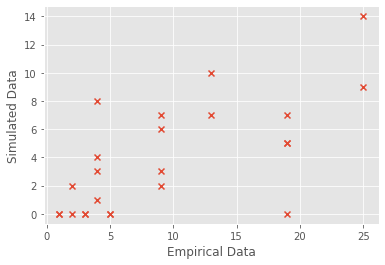

In [11]:
plt.scatter(empData, expDF_Final.crimes_dist[0], marker='x')
plt.xlabel('Empirical Data')
plt.ylabel('Simulated Data')

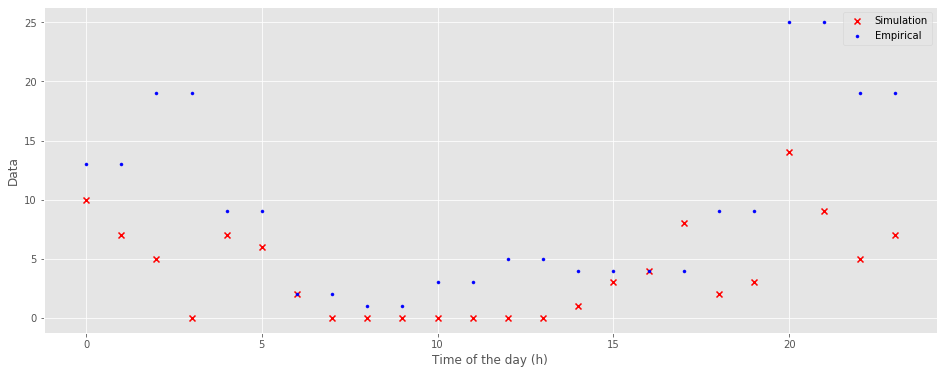

In [12]:
x = range(0,24)
plt.figure(figsize=((16,6)))
plt.scatter(x, expDF_Final.crimes_dist[0], marker='x', c='red', label='Simulation')
plt.xlabel('Time of the day (h)')
plt.ylabel('Data')
plt.scatter(x, empData, marker='.', c='blue', label='Empirical')
plt.legend()


In [13]:
expDF_Final['corr'] = [pearsonr(empData, row['crimes_dist'])[0] 
                       for index, row in expDF_Final.iterrows() ]
expDF_Final['p_value'] = [pearsonr(empData, row['crimes_dist'])[1] 
                          for index, row in expDF_Final.iterrows() ]

/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eric/Documents/CrimAI/code/Python/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
expDF_Final[['crimes_dist','corr', 'p_value']]

,crimes_dist,corr,p_value
0,"[10, 7, 5, 0, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1,...",0.677097,2.790643e-04
1,"[7, 3, 5, 3, 6, 4, 1, 3, 0, 0, 0, 1, 0, 2, 2, ...",0.825471,6.864971e-07
2,"[7, 9, 6, 3, 8, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, ...",0.746293,2.820981e-05
3,"[8, 6, 4, 0, 6, 6, 1, 2, 1, 0, 0, 0, 2, 0, 5, ...",0.379104,6.770518e-02
4,"[6, 4, 1, 4, 1, 7, 3, 1, 0, 0, 0, 0, 0, 3, 1, ...",0.677869,2.729266e-04
5,"[12, 5, 4, 4, 3, 6, 1, 5, 1, 0, 0, 0, 2, 0, 2,...",0.611750,1.490168e-03
6,"[11, 6, 1, 2, 5, 1, 4, 1, 2, 0, 0, 0, 0, 3, 0,...",0.626960,1.043115e-03
7,"[12, 7, 1, 3, 4, 5, 4, 1, 1, 1, 0, 0, 0, 0, 3,...",0.444821,2.940738e-02
8,"[10, 2, 1, 4, 5, 4, 3, 1, 2, 0, 0, 0, 2, 2, 2,...",0.592189,2.297988e-03
9,"[7, 7, 3, 2, 2, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...",0.765234,1.323669e-05


In [15]:
list(expDF_Final[expDF_Final.p_value < 0.1].crimes_dist)

[[10, 7, 5, 0, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 8, 2, 3, 14, 9, 5, 7],
 [7, 3, 5, 3, 6, 4, 1, 3, 0, 0, 0, 1, 0, 2, 2, 3, 2, 3, 5, 7, 8, 13, 8, 8],
 [7, 9, 6, 3, 8, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, 3, 3, 3, 7, 4, 6, 11, 9, 5],
 [8, 6, 4, 0, 6, 6, 1, 2, 1, 0, 0, 0, 2, 0, 5, 0, 2, 11, 4, 11, 8, 5, 8, 2],
 [6, 4, 1, 4, 1, 7, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 5, 7, 10, 9, 9, 8, 9],
 [12, 5, 4, 4, 3, 6, 1, 5, 1, 0, 0, 0, 2, 0, 2, 0, 6, 4, 3, 4, 11, 5, 15, 3],
 [11, 6, 1, 2, 5, 1, 4, 1, 2, 0, 0, 0, 0, 3, 0, 1, 0, 4, 6, 8, 6, 11, 15, 7],
 [12, 7, 1, 3, 4, 5, 4, 1, 1, 1, 0, 0, 0, 0, 3, 3, 4, 7, 9, 4, 5, 7, 8, 4],
 [10, 2, 1, 4, 5, 4, 3, 1, 2, 0, 0, 0, 2, 2, 2, 3, 6, 2, 6, 8, 10, 7, 3, 12],
 [7, 7, 3, 2, 2, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 5, 3, 9, 6, 10, 12, 7, 8],
 [11, 7, 4, 2, 4, 7, 3, 0, 1, 0, 0, 0, 0, 2, 0, 4, 5, 2, 3, 11, 6, 6, 5, 7],
 [11, 2, 5, 2, 9, 7, 3, 0, 1, 0, 0, 0, 3, 1, 4, 3, 1, 6, 1, 4, 8, 7, 8, 9],
 [10, 4, 7, 7, 4, 5, 4, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 5, 5, 9, 4, 5, 8, 9],
 [

In [16]:
expDF_Final[expDF_Final.p_value < 0.05]

,run_number,awareness-sf,motivation-sf,motivation-threshold,num-offenders,num-people,graphics-view,step,num_crimes,crimes_dist,corr,p_value
0,4,0.8,0.04,0.9,20,10000,False,7200,93,"[10, 7, 5, 0, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1,...",0.677097,2.790643e-04
1,3,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 3, 5, 3, 6, 4, 1, 3, 0, 0, 0, 1, 0, 2, 2, ...",0.825471,6.864971e-07
2,2,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 9, 6, 3, 8, 2, 2, 2, 0, 0, 0, 0, 1, 0, 3, ...",0.746293,2.820981e-05
4,6,0.8,0.04,0.9,20,10000,False,7200,93,"[6, 4, 1, 4, 1, 7, 3, 1, 0, 0, 0, 0, 0, 3, 1, ...",0.677869,2.729266e-04
5,7,0.8,0.04,0.9,20,10000,False,7200,96,"[12, 5, 4, 4, 3, 6, 1, 5, 1, 0, 0, 0, 2, 0, 2,...",0.611750,1.490168e-03
6,8,0.8,0.04,0.9,20,10000,False,7200,94,"[11, 6, 1, 2, 5, 1, 4, 1, 2, 0, 0, 0, 0, 3, 0,...",0.626960,1.043115e-03
7,1,0.8,0.04,0.9,20,10000,False,7200,93,"[12, 7, 1, 3, 4, 5, 4, 1, 1, 1, 0, 0, 0, 0, 3,...",0.444821,2.940738e-02
8,9,0.8,0.04,0.9,20,10000,False,7200,95,"[10, 2, 1, 4, 5, 4, 3, 1, 2, 0, 0, 0, 2, 2, 2,...",0.592189,2.297988e-03
9,10,0.8,0.04,0.9,20,10000,False,7200,94,"[7, 7, 3, 2, 2, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, ...",0.765234,1.323669e-05
10,12,0.8,0.04,0.9,20,10000,False,7200,90,"[11, 7, 4, 2, 4, 7, 3, 0, 1, 0, 0, 0, 0, 2, 0,...",0.534757,7.096592e-03


In [17]:
results_list = np.array(expDF_Final.crimes_dist)
results_list = [np.asarray(i) for i in results_list]
results_df = pd.DataFrame(results_list)
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,10,7,5,0,7,6,2,0,0,0,...,1,3,4,8,2,3,14,9,5,7
1,7,3,5,3,6,4,1,3,0,0,...,2,3,2,3,5,7,8,13,8,8
2,7,9,6,3,8,2,2,2,0,0,...,3,3,3,3,7,4,6,11,9,5
3,8,6,4,0,6,6,1,2,1,0,...,5,0,2,11,4,11,8,5,8,2
4,6,4,1,4,1,7,3,1,0,0,...,1,3,2,5,7,10,9,9,8,9


In [18]:
mean_results = list(results_df.mean())

In [19]:
pearsonr(empData, mean_results)

(0.7358092451060412, 4.1724875911090345e-05)